# 1. Import Libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import cufflinks as cf
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# 2. Data Exploration



In [101]:
df=pd.read_csv('/content/netflix_titles.csv')
df1=df.copy()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#####** Information **


1.   Total number of column: 12 (integer:1 and, categorical: 11)
2.   Total number of rows:8807
3.   Missing value columns: director, cast, country, date_added, rating, duration



  





In [103]:
df['director'].nunique()

4528

In [104]:
df['type'].value_counts()


,count
type,
Movie,6131
TV Show,2676


In [105]:
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [106]:
df['date']=pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')
df['date']=df['date'].dt.strftime('%d-%m-%Y')

In [107]:
df.drop('date_added', axis=1, inplace=True)

# 3. Visual Exploration


### a. WordCloud for Titles


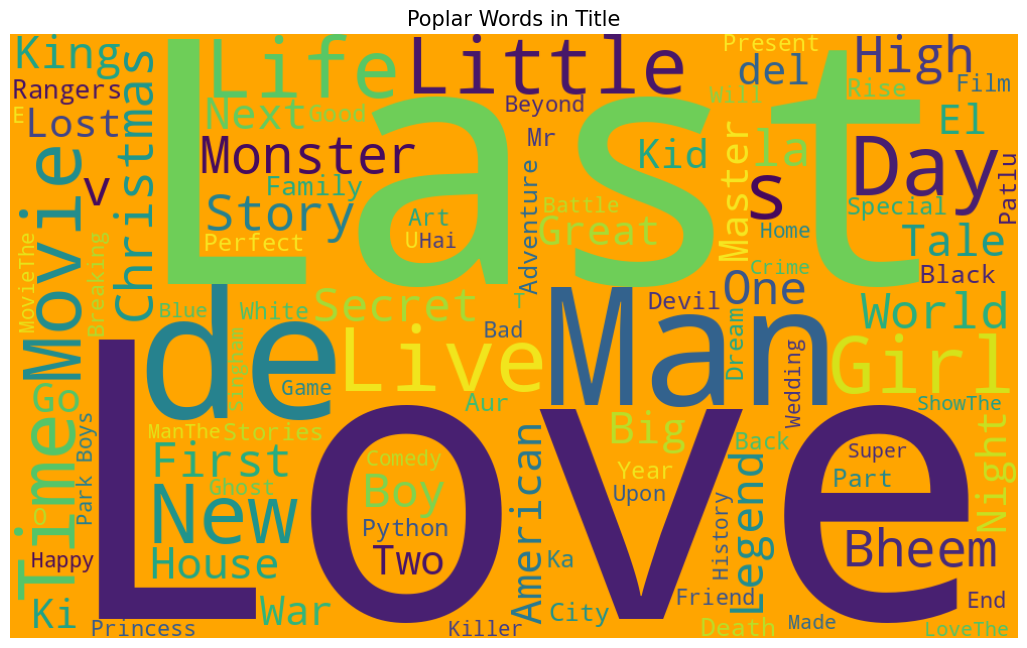

In [108]:
plt.rcParams['figure.figsize']=(13,13)
wordcloud=WordCloud(
    stopwords=STOPWORDS,
    background_color='orange',
    width=1000,
    height=600,
    max_words=100,

).generate(''.join(df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Poplar Words in Title', fontsize=15)
plt.show()

### b. Content Type Distribution

*   Count
*   Over the years




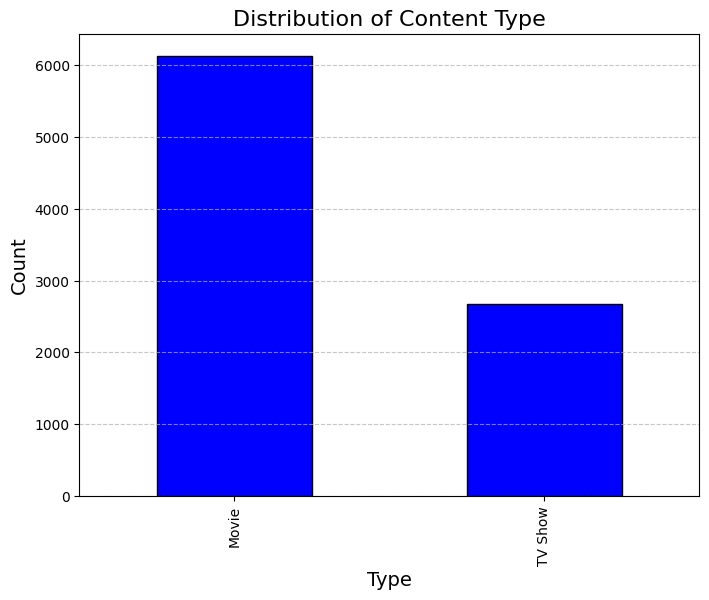

In [109]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(8,6))
type_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Distribution of Content Type', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Movie count is more than TV shows

#### Distribution of content type over the year


In [110]:
import plotly.graph_objects as go

# Prepare the data
dm = df[df['type'] == 'Movie'].groupby('release_year').count()
ds = df[df['type'] == 'TV Show'].groupby('release_year').count()

# Create the figure
fig = go.Figure([
    go.Scatter(x=dm.index,y=dm['type'],mode='lines',name='Movies',line_color='skyblue'),
    go.Scatter(x=ds.index,y=ds['type'],mode='lines',name='TV Shows',line_color='red')
    ])

# Add shaded area for 2015–2020
fig.add_vrect(
    x0=2015, x1=2020,
    fillcolor="yellow",
    opacity=0.2,
    layer="below",
    line_width=0,
    annotation_text="2015–2020 Period",
    annotation_position="top left"
)

# Customize layout
fig.update_layout(
    title='Movie and TV Show Comparison Over the Years',
    xaxis_title='Year',
    yaxis_title='Count',
    plot_bgcolor='black',
    paper_bgcolor='lightgray',
    font_color='white',
    legend=dict(bgcolor='black', bordercolor='white'),
)

# Show the plot
fig.show()

### c. Director and Actor Analysis

*   Directors with more than 10 projects
*   Top actor in USA


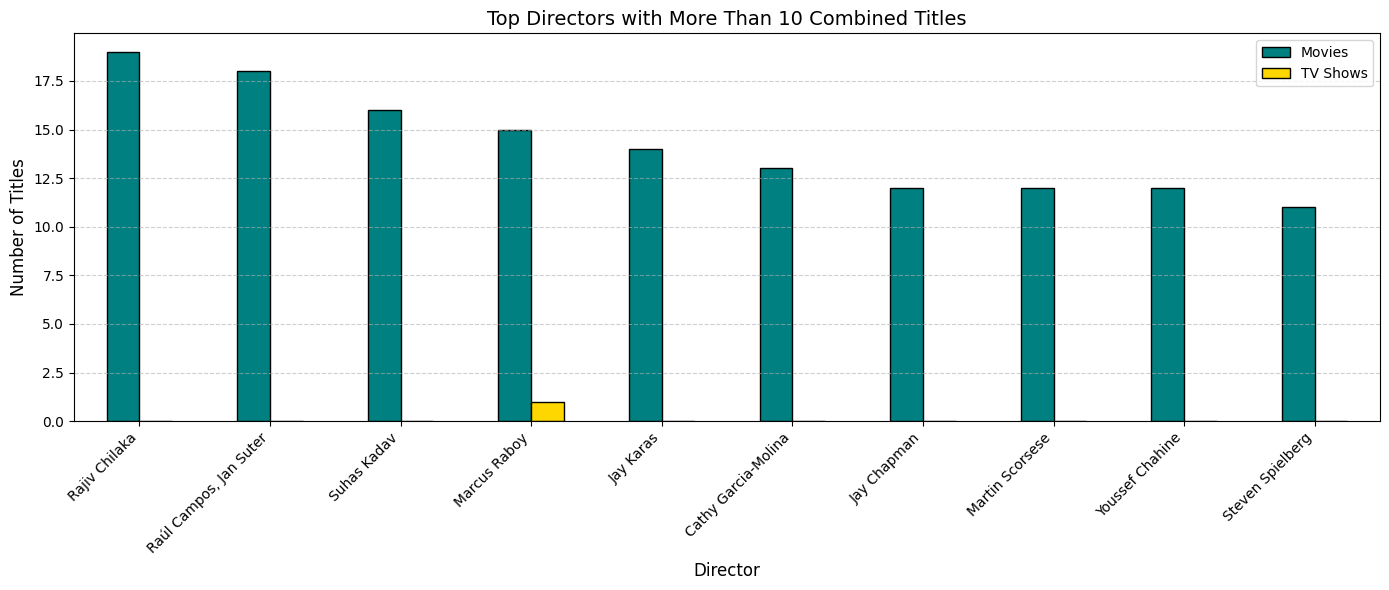

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create subsets
dx = df[df['type'] == 'Movie']
dl = df[df['type'] == 'TV Show']

# Count titles by director
movie_directors = dx['director'].value_counts()
tv_directors = dl['director'].value_counts()

# Combine into a single DataFrame
combined = pd.DataFrame({
    'Movies': movie_directors,
    'TV Shows': tv_directors
}).fillna(0)

# Filter directors with total titles > 10
combined['Total'] = combined['Movies'] + combined['TV Shows']
filtered = combined[combined['Total'] > 10].sort_values('Total', ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
filtered[['Movies', 'TV Shows']].plot(kind='bar', ax=ax, color=['teal', 'gold'], edgecolor='black')

# Customizations
plt.title('Top Directors with More Than 10 Combined Titles', fontsize=14)
plt.xlabel('Director', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [112]:
df = df.dropna(subset=['cast'])
df['cast_list'] = df['cast'].str.split(',')
df['cast_list'] = df['cast_list'].apply(lambda x: [i.strip() for i in x])
exploded_cast = df.explode('cast_list')
MC=exploded_cast[
    (exploded_cast['country']=='United States') &
     (exploded_cast['type']=='Movie')
     ]['cast_list'].value_counts()

fig=go.Figure(data=go.Bar(x=MC.head(10).index, y=MC.head(10)))
fig.update_layout(
    title='Top Actor in United States',
    xaxis_title='Actor',
    yaxis_title='Count')

fig.show()

## d. Rating Distribution

In [113]:
fig=go.Figure(data=go.Bar(x=df['rating'].value_counts().index, y=df['rating'].value_counts().values))
fig.update_layout(
    title='Rating Distribution',
    xaxis_title='rating',
    yaxis_title='count',
    plot_bgcolor='black')
fig.show()

In [114]:
fig=go.Figure(data=go.Bar(x=df['country'].value_counts().head(10).index, y=df['country'].value_counts().head(10)))
fig.update_layout(
    title='Top 10 Countries with Most Content',
    xaxis_title='Country',
    yaxis_title='Count',
    plot_bgcolor='black')
fig.show()

In [115]:
exploded_cast[exploded_cast['country']=='India']['cast_list'].value_counts().idxmax()

'Anupam Kher'

In [116]:
exploded_cast[
    (exploded_cast['country']=='United States') &
     (exploded_cast['type']=='TV Show')
     ]['cast_list'].value_counts().idxmax()

'Mike Colter'

### e. Top 10 Genre

1.   TV Series
2.   Movie



In [117]:
df['list']=df['listed_in'].str.split(',').apply(lambda x:[i.strip() for i in x])
exploded_list=df['list'].explode()
fig=go.Figure(data=go.Bar(x=exploded_list.value_counts().index, y=exploded_list.value_counts().values))
fig.update_layout(
    title='Top 10 Genre',
    xaxis_title='Genre',
    yaxis_title='Count'
)
fig.show()

## Data Cleaning for Recommendation

In [118]:
def release_year(year):
  year=int(year)
  if year<=1950:
    year='classic'
  elif year>1950 and year<=1990:
    year='old'
  elif year>1990 and year<=2010:
    year='modern'
  else:
    year='recent'
  return year

df1['release_year']=df1['release_year'].apply(release_year)

df1['cast']=df1['cast'].fillna('')
df1['cast'] = df1['cast'].map(lambda x: x.split(',')[:3])

Column=['director', 'cast','country', 'release_year', 'rating', 'listed_in', 'description' ]

In [119]:
def clean(df1,Column):
  for col in Column:
    df1[col]=df1[col].fillna('')
    df1[col]=df1[col].astype(str).str.split(',').apply(lambda x: [i.strip().lower() for i in x])

clean(df1,Column)

def clean2(df1, Column):
  packed=[]
  for index, row in df1.iterrows():
    combined=''
    for col in Column:
      value=row[col]
      if isinstance(value, list):
        combined+=' '.join(value)+' '
      else:
        combined+=str(value)+' '
    packed.append(combined.strip().lower())
  df1['packedWord']= packed
clean2(df1, Column)

df1.set_index('title', inplace=True)

df2={'packedWord':df1['packedWord']}
df2=pd.DataFrame(df2)
df2.head()

,packedWord
title,
Dick Johnson Is Dead,kirsten johnson [''] united states recent pg-1...
Blood & Water,['ama qamata' ' khosi ngema' ' gail mabalane']...
Ganglands,julien leclercq ['sami bouajila' ' tracy gotoa...
Jailbirds New Orleans,[''] recent tv-ma docuseries reality tv feuds...
Kota Factory,['mayur more' ' jitendra kumar' ' ranjan raj']...


In [120]:
!pip install rake_nltk
import nltk
from rake_nltk import Rake
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [121]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [122]:
stop_word=stopwords.words('english')
lemetizer=WordNetLemmatizer()
import string
def clean3(text):
  text=text.translate(str.maketrans('', '', string.punctuation))
  token=text.split()
  token=(word for word in token if word not in stop_word)
  lemetized=(lemetizer.lemmatize(word) for word in token)
  return ' '.join(lemetized)

df2['packedWord']=df2['packedWord'].apply(clean3)



In [123]:
df2.head()

,packedWord
title,
Dick Johnson Is Dead,kirsten johnson united state recent pg13 docum...
Blood & Water,ama qamata khosi ngema gail mabalane south afr...
Ganglands,julien leclercq sami bouajila tracy gotoas sam...
Jailbirds New Orleans,recent tvma docuseries reality tv feud flirtat...
Kota Factory,mayur jitendra kumar ranjan raj india recent t...


## Recommendation Model

In [124]:
tfidf=TfidfVectorizer(stop_words='english')
tfidf_matrix= tfidf.fit_transform(df2['packedWord'])

In [125]:
cosine_sim=cosine_similarity(tfidf_matrix, tfidf_matrix)


In [126]:

def recommendation_model(title, cosine_sim= cosine_sim):
  idx = df2.index.get_loc(title)
  sim_score= list(enumerate(cosine_sim[idx]))
  sim_score=sorted(sim_score, key=lambda x:x[1], reverse=True)
  sim_score=sim_score[1:11]
  show_indices=[i[0] for i in sim_score]
  return df2.iloc[show_indices].index.tolist()


In [127]:
df2.head()


,packedWord
title,
Dick Johnson Is Dead,kirsten johnson united state recent pg13 docum...
Blood & Water,ama qamata khosi ngema gail mabalane south afr...
Ganglands,julien leclercq sami bouajila tracy gotoas sam...
Jailbirds New Orleans,recent tvma docuseries reality tv feud flirtat...
Kota Factory,mayur jitendra kumar ranjan raj india recent t...


In [128]:
recommendation_model('Rocky')


['Rocky III',
 'Rocky IV',
 'Rocky II',
 'Rocky V',
 'Spy Kids 3: Game Over',
 'Cliffhanger',
 'The Karate Kid Part III',
 'The Karate Kid',
 'Raiders!: The Story of the Greatest Fan Film Ever Made',
 'The Bleeder']